# Imports

In [1]:
import pandas as pd 
import ast
from ast import literal_eval
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing
from multiprocessing import Pool
import CleaningFunctions
from functools import partial
from IPython.display import display, clear_output
import math

import winsound
from numpy import *


import statistics

from datetime import datetime
from dateutil.parser import parse
import time
import datetime

import csv

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


# Reading and Cleaning data - changing everything into neumeric value

In [2]:
# Initializing certain lists to be edited

dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']
dataID = { 'belongs_to_collection' : 'id',  'genres': 'id', 'production_companies': 'id', 'production_countries': 'iso_3166_1',  'spoken_languages': 'iso_639_1', 'Keywords': 'id', 'cast': 'id', 'crew': 'id'}
dataNeeded = ['id', 'belongs_to_collection', 'budget', 'genres', 'original_language',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'Keywords',
       'cast', 'crew', 'revenue']

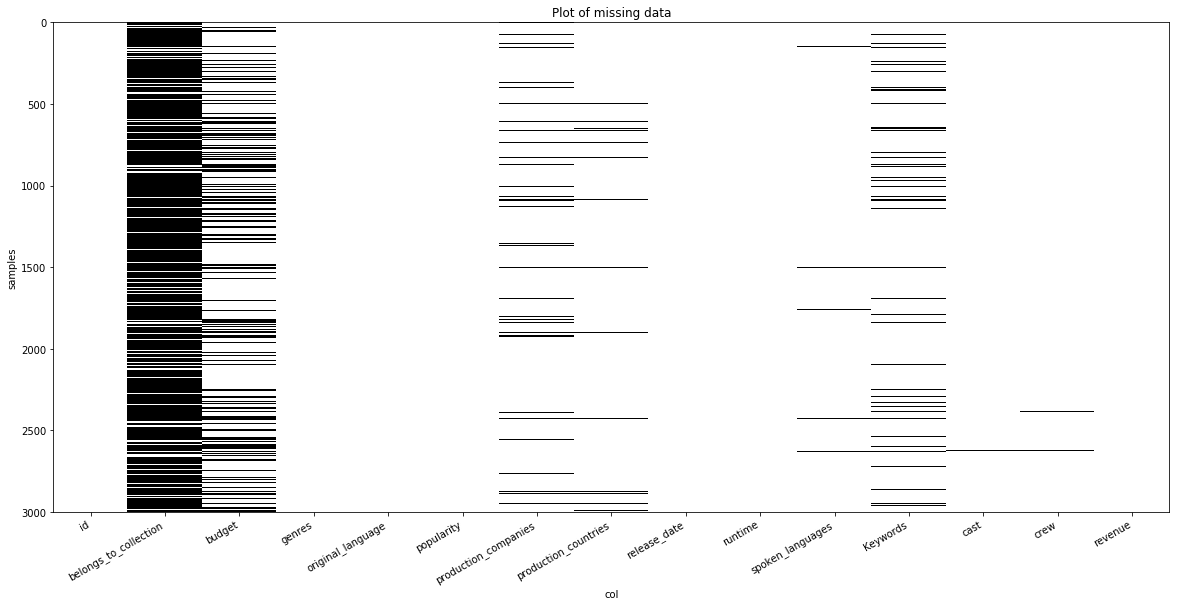

id belongs_to_collection      budget                  genres  \
0   1              [313576]  14000000.0                    [35]   
1   2              [107674]  40000000.0  [35, 18, 10751, 10749]   
2   3                    []   3300000.0                    [18]   
3   4                    []   1200000.0                [53, 18]   
4   5                    []         NaN                [28, 53]   

   original_language  popularity production_companies production_countries  \
0                  0    6.575393        [4, 60, 8411]                  [0]   
1                  0    8.248895                  [2]                  [0]   
2                  0   64.299990  [2266, 3172, 32157]                  [0]   
3                  1    3.174936                   []                  [5]   
4                  2    1.148070                   []                 [15]   

  release_date  runtime spoken_languages  \
0      2/20/15     93.0              [0]   
1     8/6/2004    113.0              [0]   
2   10/10/2014    105.0              [0]   
3     3/9/2012    122.0           [0, 8]   
4     2/5/2009    118.0             [11]   

                                            Keywords  \
0                        [4379, 9663, 11830, 179431]   
1                          [2505, 4263, 6038, 13072]   
2  [1416, 1523, 1640, 2176, 14512, 14819, 33896, ...   
3  [10092, 10540, 11734, 14536, 14636, 208364, 22...   
4                                                 []   

                                                cast  \
0  [52997, 64342, 54729, 36801, 54812, 94098, 115...   
1  [1813, 5823, 1210, 655, 33656, 62064, 68287, 1...   
2  [996701, 18999, 129104, 970216, 223012, 159366...   
3  [35068, 85047, 1021524, 1093644, 86033, 92686,...   
4                     [84751, 64453, 84752, 1130534]   

                                                crew   revenue  
0  [1449071, 3227, 347335, 347335, 57822, 1451395...  12314651  
1  [1201, 1214, 4500, 8851, 12970, 38415, 38416, ...  95149435  
2  [494, 6745, 9250, 23783, 23786, 53181, 52443, ...  13092000  
3                              [95510, 95510, 95510]  16000000  
4                                     [84749, 84749]   3923970

In [3]:
#setting the file we want to read
file = "train.csv"
file_name = file[:-4]
# quotechar='"',na_values = [0] , quoting=3, 
#reading from CSV
df = pd.read_csv(file, header= 0, quotechar='"', sep=',', encoding = "ISO-8859-1",keep_default_na=True, 
                dtype = { 'belongs_to_collection' : 'category',  'genres' : 'category', 'original_language' : 'category', 'production_companies' : 'category', 'production_countries' : 'category',  'spoken_languages' : 'category', 'Keywords' : 'category', 'cast' : 'category', 'crew' : 'category'},
                
                )

df = df.replace(0, np.nan)

#dropping the columns that was not needed
for col in df.keys():
    if not (col in dataNeeded) :
        df = df.drop(columns = col)
        
#http://www.maths.bath.ac.uk/~jjf23/LMR/python/missing.html

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(~df.isna(), aspect='auto')
label = df.keys().tolist()
plt.imshow(~df.isna(), aspect='auto')
plt.xlabel("col")
plt.ylabel("samples")
ax.set_xticks(np.arange(len(label)))
ax.set_xticklabels(label)
fig.autofmt_xdate()
plt.title("Plot of missing data")
plt.gray()
plt.show()

#filling empty list with []
for col in dataList :
    try:
        df[col] = df[col].cat.add_categories('[]',inplace = False)
    except:
        pass
    df[col].fillna( '[]' , inplace = True) 

#changing a sting of list into list
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval)     

#changing the dict in the list into ID only
for col in dataList : 
    for row in range(len(df)) :
        for num in range(len(df[col][row])) :
            if not (isinstance(df[col][row][num], int) or isinstance(df[col][row][num], str)):
                df[col][row][num] = df[col][row][num][dataID[col]]    

# getting all unique values
uniqueSpokenLanguage = df['spoken_languages'].apply(pd.Series).stack().value_counts().keys().values.tolist()
for row in range(len(df)) :
    for num in range(len(df['spoken_languages'][row])):
        df['spoken_languages'][row][num] = uniqueSpokenLanguage.index(df.spoken_languages[row][num])

uniqueOrgLanguage = df['original_language'].unique().tolist()
df.original_language = df.original_language.replace(uniqueOrgLanguage,range(len(uniqueOrgLanguage)))

uniqueCountries = df['production_countries'].apply(pd.Series).stack().value_counts().keys().values.tolist()

for row in range(len(df)) :
    for num in range(len(df['production_countries'][row])):
        df['production_countries'][row][num] = uniqueCountries.index(df.production_countries[row][num])

df.head()

In [4]:
#changing the time into numerical value

currentDT = datetime.datetime.now()
print (str(currentDT))

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = range(len(df))
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.time2num, df)
    result = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)

df["release_date"] = result

2019-05-09 03:32:01.836594
263.24956464767456


In [6]:
# save to save.csv as a checkpoint 
df.to_csv('save_ORG_'+file_name+'.csv',index_label = False)

df = pd.read_csv('save_ORG_'+file_name+'.csv')
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval) 

# Getting only low variance value for vectors that is too large to compute

In [7]:
import os
import statistics

# if the file already exist, then do not need to check out the performance again 
if(os.path.isfile('Performance.csv')):
    PerformanceDF = pd.read_csv('Performance.csv')
else:
    PerformanceDF = pd.DataFrame(columns=['col','id', 'mean', 'var'])
    for col in dataList:
        print(col)
        
        #collect all revenue for each crew
        
        Rev_List = {}
        for x in range(len(df)):
            if not (isinstance(df[col][x], float )):
                for y in range( len(df[col][x])):
                    if (df[col][x][y] not in Rev_List):
                        list = []
                        Rev_List.update( {df[col][x][y]: list} )
                    Rev_List[df[col][x][y]].append(df["revenue"][x])

        #calculate the variance of revenue for each crew
        for id in Rev_List.keys():
            if (len(Rev_List[id]) > 2):
                PerformanceDF = PerformanceDF.append({"col": col,"id" : id, 'var':np.var(Rev_List[id]), 'mean' : statistics.mean(Rev_List[id])},ignore_index=True)
            else : 
                PerformanceDF.append({"id" : col+str(id) },ignore_index=True)
    PerformanceDF.to_csv('Performance.csv',index_label = False)

In [8]:
PerformanceDF.head()

col     id       mean           var
0  belongs_to_collection   1575  176840916  4.003317e+15
1  belongs_to_collection   9735   41211249  1.108604e+15
2  belongs_to_collection  90863  283244966  2.084164e+15
3  belongs_to_collection   8354  584865942  4.215160e+16
4  belongs_to_collection    645  302243560  4.831786e+16

In [9]:
# adding the extra columns for the most related crew

import datetime

currentDT = datetime.datetime.now()
print (str(currentDT))

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = dataList
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.Getting3MostRelated, df)
    df_temp = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)
    
for bigCol in range(len(df_temp)):
    for smallCol in df_temp[bigCol][0]:
        df[smallCol] = df_temp[bigCol][0][smallCol]

2019-05-09 04:05:35.727217
240.86862516403198


In [10]:
df.head()

id belongs_to_collection      budget                  genres  \
0   1              [313576]  14000000.0                    [35]   
1   2              [107674]  40000000.0  [35, 18, 10751, 10749]   
2   3                    []   3300000.0                    [18]   
3   4                    []   1200000.0                [53, 18]   
4   5                    []         NaN                [28, 53]   

   original_language  popularity production_companies production_countries  \
0                  0    6.575393        [4, 60, 8411]                  [0]   
1                  0    8.248895                  [2]                  [0]   
2                  0   64.299990  [2266, 3172, 32157]                  [0]   
3                  1    3.174936                   []                  [5]   
4                  2    1.148070                   []                 [15]   

   release_date  runtime  ...   cast1_mean     cast1_var  cast2_mean  \
0      21964.75     93.0  ...   26027656.0  1.362847e+14  20273220.0   
1      18114.75    113.0  ...  115016606.0  1.284649e+15  58486780.0   
2      21831.75    105.0  ...   19484547.0  5.081406e+14  48097087.0   
3      20886.75    122.0  ...          NaN           NaN         NaN   
4      19758.75    118.0  ...          NaN           NaN         NaN   

      cast2_var  crew0_mean     crew0_var  crew1_mean     crew1_var  \
0  1.670920e+14  13394693.0  8.045325e+12  13012443.0  6.325491e+13   
1  2.378023e+15  38844585.0  1.120362e+15  48704215.0  1.185739e+15   
2  2.180879e+15   4745780.0  3.485830e+13  32672509.0  3.628084e+14   
3           NaN  16000000.0  0.000000e+00  16000000.0  0.000000e+00   
4           NaN         NaN           NaN         NaN           NaN   

   crew2_mean     crew2_var  
0  20380993.0  7.318037e+13  
1  96813765.0  1.997366e+15  
2  32672509.0  3.628084e+14  
3  16000000.0  0.000000e+00  
4         NaN           NaN  

[5 rows x 59 columns]

In [11]:
#dropping the extra columns that was already extracted
for col in dataList:
    if(col in df):
        df = df.drop(columns=col)

In [12]:
# save to save_BeforeNormalize as checkpoint 
df.to_csv('save_BeforeNormalize_'+file_name+'.csv',index_label = False)
df = pd.read_csv('save_BeforeNormalize_'+file_name+'.csv')

In [13]:
df.head()

id      budget  original_language  popularity  release_date  runtime  \
0   1  14000000.0                  0    6.575393      21964.75     93.0   
1   2  40000000.0                  0    8.248895      18114.75    113.0   
2   3   3300000.0                  0   64.299990      21831.75    105.0   
3   4   1200000.0                  1    3.174936      20886.75    122.0   
4   5         NaN                  2    1.148070      19758.75    118.0   

    revenue  belongs_to_collection0_mean  belongs_to_collection0_var  \
0  12314651                          NaN                         NaN   
1  95149435                          NaN                         NaN   
2  13092000                          NaN                         NaN   
3  16000000                          NaN                         NaN   
4   3923970                          NaN                         NaN   

   genres0_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0    60875742.0  ...   26027656.0  1.362847e+14  20273220.0  1.670920e+14   
1    45406073.0  ...  115016606.0  1.284649e+15  58486780.0  2.378023e+15   
2    45406073.0  ...   19484547.0  5.081406e+14  48097087.0  2.180879e+15   
3    45406073.0  ...          NaN           NaN         NaN           NaN   
4    68336641.0  ...          NaN           NaN         NaN           NaN   

   crew0_mean     crew0_var  crew1_mean     crew1_var  crew2_mean  \
0  13394693.0  8.045325e+12  13012443.0  6.325491e+13  20380993.0   
1  38844585.0  1.120362e+15  48704215.0  1.185739e+15  96813765.0   
2   4745780.0  3.485830e+13  32672509.0  3.628084e+14  32672509.0   
3  16000000.0  0.000000e+00  16000000.0  0.000000e+00  16000000.0   
4         NaN           NaN         NaN           NaN         NaN   

      crew2_var  
0  7.318037e+13  
1  1.997366e+15  
2  3.628084e+14  
3  0.000000e+00  
4           NaN  

[5 rows x 51 columns]

# Verification for the predicting method

In [14]:
#creating df df_pred to those col with non-nan values > 2000 for controlling the missing rate

predicting_list = []
print("Excluded columns:")
for col in df:
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col, df[col].count())
        
if not (file == "test.csv"):
    predicting_list.remove("revenue")

df_pred = pd.read_csv('save_BeforeNormalize_'+file_name+'.csv')
df_pred = df_pred[predicting_list].copy()

Excluded columns:
belongs_to_collection0_mean 132
belongs_to_collection0_var 132
genres2_mean 1428
genres2_var 1428
production_companies1_mean 1185
production_companies1_var 1185
production_companies2_mean 557
production_companies2_var 557
production_countries1_mean 716
production_countries1_var 716
production_countries2_mean 186
production_countries2_var 186
spoken_languages1_mean 860
spoken_languages1_var 860
spoken_languages2_mean 317
spoken_languages2_var 317


In [15]:
# calculating the missing rate of df_pred (the columns that we want to do prediction with)

missing = sum(len(df_pred) - df_pred.count())
assist = sum(df.count())

tar_miss_rate = missing/(missing+assist)
print("Target missing rate:  ",tar_miss_rate)

Target missing rate:   0.11768974274805204


In [16]:
#creating a df_complete that was copied from the origional df with rows that have no missing value

completeList = []
for x in range(len(df)):
    flag = 0
    for col in predicting_list:
        if (np.isnan(df_pred[col][x])):
            flag = 1
    if flag == 0:
        completeList.append(x)      
        
df_complete = pd.DataFrame()
rows = df_pred.loc[completeList]
df_complete = df_complete.append(rows, ignore_index=True)

In [17]:
#normalizing df_complete
from sklearn import preprocessing

# Normalize Training Data 
std_scale_fullset = preprocessing.StandardScaler().fit(df_complete)
x_train_norm = std_scale_fullset.transform(df_complete)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=df_complete.index, columns=df_complete.columns) 
df_complete.update(training_norm_col)


C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [18]:
# sampling from df_complete to creat df_complete_sampled for different missing rate for testing

import random

df_complete_sampled_list = []

for tar_miss_rate in range(6, 30, 4):
    
    tar_miss_rate = tar_miss_rate/100
    df_complete_sampled = df_complete.copy()
    
    exclude_id_colList = df_complete.columns.tolist()[1:]

    for x in range(len(df_complete)):
        for col in exclude_id_colList:
            rand = random.random()
            if (rand <= tar_miss_rate):
                df_complete_sampled[col][x] = np.nan
                
    df_complete_sampled_list.append(df_complete_sampled)

In [19]:
# seperating the col that we want to do MSE or Hit_Rate
col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', ]
           
col_Hit = ['id', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var','Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var']

In [20]:
#Reading the very original dataframe with things as list

orgDF = pd.read_csv('save_ORG_'+file_name+'.csv')

#changing a sting of list into list

for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)     

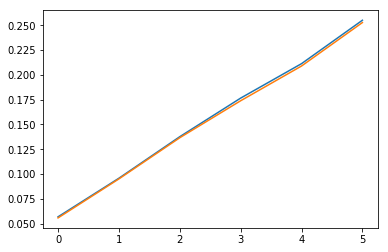

In [21]:
missing_rate_list = []
missing_rate_list_col_Hit = []
for df_complete_sampled in df_complete_sampled_list:

    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled) - df_complete_sampled.count())
    assist = sum(df_complete_sampled.count())

    miss_rate = missing/(missing+assist)
    missing_rate_list.append(miss_rate)
    
    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled[col_Hit]) - df_complete_sampled[col_Hit].count())
    assist = sum(df_complete_sampled[col_Hit].count())

    miss_rate = missing/(missing+assist)
    missing_rate_list_col_Hit.append(miss_rate)


plt.plot(missing_rate_list)
plt.plot(missing_rate_list_col_Hit)

In [22]:
col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', ]
           
col_Hit = ['id', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var','Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var']

col_Hit_sub = ['genres0', 'genres1','Keywords0',
        'Keywords1',  'Keywords2',
        'cast0', 'cast1', 
       'cast2',  'crew0', 'crew1',
        'crew2']

dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']

dataList_expendsize = { 'belongs_to_collection':1,  'genres':3, 'production_companies':3, 'production_countries':3,  'spoken_languages':3, 'Keywords':3, 'cast':3, 'crew':3}

orgDF = pd.read_csv('save_ORG_'+file_name+'.csv')

for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)    
    
PerformanceDF = pd.read_csv('Performance.csv')
PerformanceDF["mean"] = PerformanceDF["mean"].astype(float)
PerformanceDF["var"] = round(PerformanceDF["var"],0)

def hitRate(predDF,df_complete_sampled, std_scale_fullset,col_Hit):
    
    winsound.Beep(1800, 1000)
    cols = predDF.columns 
    predDF = pd.DataFrame(std_scale_fullset.inverse_transform(predDF), columns = cols)

    predDF = predDF[col_Hit]
    predDF.rename(columns={"id": "id0"}, inplace=True)
    predDF = round(predDF,0)
    hit = 0
    count = 0
    colist = col_Hit_sub
    Org_IDList = orgDF["id"].tolist()
    print(predDF.head())
    for col in colist:
        for x in range(len(predDF)):
            if np.isnan(df_complete_sampled[col+"_mean"][x]):
                TargetID = PerformanceDF.loc[(PerformanceDF['mean'] < predDF[col+"_mean"][x]+6234511.514) & 
                                             (PerformanceDF['mean'] > predDF[col+"_mean"][x]-6234511.514) &
                                             (PerformanceDF['var'] < predDF[col+"_var"][x]+50791034.15)&
                                             (PerformanceDF['var'] > predDF[col+"_var"][x]-50791034.15)&
                                             (PerformanceDF['col']==col[:-1])]["id"]
                flag = 0
                print("TargetID :  ", TargetID.tolist())
                for id in TargetID:
                    if (predDF["id0"][x] in Org_IDList):
                        cell = orgDF["id"].tolist().index(predDF["id0"][x])
                        if id in orgDF[col[:-1]][cell]:
                            print("HIT!")
                            flag = 1
                hit = hit + flag
                count +=1
    return hit / count

In [23]:
winsound.Beep(1800, 1000)
from fancyimpute import KNN 
from fancyimpute import IterativeImputer 
from fancyimpute import SoftImpute 
from fancyimpute import IterativeSVD 
from sklearn.impute import SimpleImputer
from impyute.imputation.cs import mice



now = time.time()

rmsDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'IterativeSVD','mice','SoftImpute','mean','median','most_frequent','constant'],index=missing_rate_list)
rmsAllDict = pd.DataFrame(columns=['KNN','IterativeImputer', 'IterativeSVD','mice','SoftImpute','mean','median','most_frequent','constant'],index=missing_rate_list)
hitDict = pd.DataFrame(columns=['KNN','IterativeImputer', 'IterativeSVD','mice','SoftImpute','mean','median','most_frequent','constant'],index=missing_rate_list)


for i , df_complete_sampled in enumerate(df_complete_sampled_list):
    tar_miss_rate = missing_rate_list[i]
    rms_list = []
    rmsAll_list = []
    hit_list = []
    for k in range(5):
        df_predicted = pd.DataFrame(KNN(k,verbose=False).fit_transform(df_complete_sampled))

        df_predicted.columns  = df_complete.columns 

        rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
        rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
        hit = hitRate(df_predicted, df_complete_sampled, std_scale_fullset,col_Hit)
        rms_list.append(rms)
        rmsAll_list.append(rmsAll)
        hit_list.append(hit)

    rmsDict["KNN"][tar_miss_rate] = round(min(rms_list), 5) 
    rmsAllDict["KNN"][tar_miss_rate] = round(min(rmsAll_list), 5) 
    hitDict["KNN"][tar_miss_rate] = round(max(hit_list), 5) 
    
    
    # Prediction with IterativeImputer
    df_predicted = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_complete_sampled))
    df_predicted.columns  = df_complete.columns 
    rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
    rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
    hit = hitRate(df_predicted,df_complete_sampled, std_scale_fullset,col_Hit)

    rmsDict["IterativeImputer"][tar_miss_rate] = round(rms, 5) 
    rmsAllDict["IterativeImputer"][tar_miss_rate] = round(rmsAll, 5)
    hitDict["IterativeImputer"][tar_miss_rate] = round(hit, 5) 
    
    # Prediction with IterativeSVD
    df_predicted = pd.DataFrame(IterativeSVD(verbose=False).fit_transform(df_complete_sampled))
    df_predicted.columns  = df_complete.columns 
    rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
    rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
    hit = hitRate(df_predicted,df_complete_sampled, std_scale_fullset,col_Hit)

    rmsDict["IterativeSVD"][tar_miss_rate] = round(rms, 5) 
    rmsAllDict["IterativeSVD"][tar_miss_rate] = round(rmsAll, 5)
    hitDict["IterativeSVD"][tar_miss_rate] = round(hit, 5) 
    
    # Prediction with mice
    df_predicted = pd.DataFrame(mice(df_complete_sampled))
    df_predicted.columns  = df_complete.columns 
    rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
    rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
    hit = hitRate(df_predicted,df_complete_sampled, std_scale_fullset,col_Hit)

    rmsDict["mice"][tar_miss_rate] = round(rms, 5) 
    rmsAllDict["mice"][tar_miss_rate] = round(rmsAll, 5)
    hitDict["mice"][tar_miss_rate] = round(hit, 5) 
    
    # Prediction with SoftImpute 

    df_predicted = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_complete_sampled))
    df_predicted.columns  = df_complete.columns 
    rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
    rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
    hit = hitRate(df_predicted,df_complete_sampled, std_scale_fullset,col_Hit)

    rmsDict["SoftImpute"][tar_miss_rate] = round(rms, 5) 
    rmsAllDict["SoftImpute"][tar_miss_rate] = round(rmsAll, 5) 
    hitDict["SoftImpute"][tar_miss_rate] = round(hit, 5) 

    #Prediction with 'mean','median','most_frequent'

    # https://scikit-learn.org/stable/modules/impute.html#impute
    

    for stra in ['mean','median','most_frequent','constant']:

        imp = SimpleImputer(missing_values=np.nan, strategy=stra, fill_value = 0)
        imp.fit(df_complete_sampled)
        df_predicted = imp.transform(df_complete_sampled)
        df_predicted = pd.DataFrame(df_predicted)
        df_predicted.columns  = df_complete.columns
        rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
        rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
        hit = hitRate(df_predicted, df_complete_sampled, std_scale_fullset,col_Hit)

        rmsDict[stra][tar_miss_rate] = round(rms, 5) 
        rmsAllDict[stra][tar_miss_rate] = round(rmsAll, 5) 
        hitDict[stra][tar_miss_rate] = round(hit, 5) 
        
    print(rmsDict)
print(time.time() - now)

    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    59633963.0  8.096473e+15    68336641.0  1.352438e+16   
1  17.0    52709070.0  7.584055e+15    68336641.0  2.189443e+16   
2  20.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
3  30.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
4  33.0   111043446.0  3.867814e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   4.776647e+15      48103854.0   7.751986e+15   
1      55572354.0   4.975964e+15      64231105.0   7.462317e+15   
2      43650593.0   3.231662e+15      98446978.0   4.186604e+15   
3      75186178.0   4.810196e+15      74205285.0   6.698661e+15   
4     161972999.0   4.810196e+15      90808908.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    59633963.0  8.096473e+15    68336641.0  1.352438e+16   
1  17.0    52709070.0  7.584055e+15    68336641.0  1.512023e+16   
2  20.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
3  30.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
4  33.0   111043446.0  3.867814e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   4.776647e+15      48103854.0   7.751986e+15   
1      55572354.0   4.975964e+15      64231105.0   7.462317e+15   
2      43650593.0   3.231662e+15      98446978.0   4.186604e+15   
3      75186178.0   1.409408e+15      73698196.0   6.698661e+15   
4     161972999.0   1.581638e+16      90808908.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    59633963.0  8.096473e+15    68336641.0  1.352438e+16   
1  17.0    52709070.0  8.629307e+15    68336641.0  1.352438e+16   
2  20.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
3  30.0    56731887.0  1.101972e+16    68336641.0  1.352438e+16   
4  33.0   111043446.0  3.436515e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   4.776647e+15      72655434.0   7.751986e+15   
1      55572354.0   4.975964e+15      64231105.0   7.462317e+15   
2      43650593.0   3.231662e+15      98446978.0   4.186604e+15   
3      75186178.0   1.312882e+15      86089963.0   6.698661e+15   
4     161972999.0   2.152685e+15      90808908.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    59633963.0  1.346892e+16    68336641.0  1.352438e+16   
1  17.0    52709070.0  7.584055e+15    68336641.0  1.352438e+16   
2  20.0    59491276.0  1.367908e+16    68336641.0  1.352438e+16   
3  30.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
4  33.0   111043446.0  3.867814e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   4.776647e+15      48103854.0   7.751986e+15   
1      55572354.0   4.975964e+15      64231105.0   2.741842e+15   
2      43650593.0   3.231662e+15      98446978.0   4.186604e+15   
3      75186178.0   1.967465e+15      86089963.0   6.698661e+15   
4     179862954.0   2.152685e+15     147680715.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      36179555.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    48225731.0  8.096473e+15    68336641.0  1.352438e+16   
1  17.0    52709070.0  8.812519e+15    68336641.0  1.562542e+16   
2  20.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
3  30.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
4  33.0   111043446.0  3.867814e+16   153364387.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   4.776647e+15      48103854.0   7.751986e+15   
1      55572354.0   4.975964e+15      64231105.0   7.462317e+15   
2      79521186.0   3.608083e+15      98446978.0   4.186604e+15   
3      75186178.0   1.312882e+15      78806732.0   6.698661e+15   
4     161972999.0   2.152685e+15      90808908.0   1.766716e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    51347262.0  8.096473e+15    68336641.0  1.352438e+16   
1  17.0    52709070.0  7.584055e+15    68336641.0  1.428061e+16   
2  20.0    54969403.0  9.866366e+15    68336641.0  1.774038e+16   
3  30.0    58936790.0  1.101972e+16    68336641.0  1.352438e+16   
4  33.0   111043446.0  3.867814e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   9.563014e+15      48103854.0   1.203133e+16   
1      55572354.0   4.975964e+15      31408190.0   7.462317e+15   
2      43650593.0   3.231662e+15      98446978.0   4.186604e+15   
3      75186178.0   5.079387e+15      86089963.0   6.698661e+15   
4     161972999.0   2.152685e+15     302105930.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.132140e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    59633963.0  8.096473e+15    68336641.0  1.352438e+16   
1  17.0    52709070.0  7.584055e+15    68336641.0  1.352438e+16   
2  20.0    59491276.0  1.101972e+16    68336641.0  1.352438e+16   
3  30.0    59491276.0  1.249634e+16    68336641.0  1.431286e+16   
4  33.0   111043446.0  3.867814e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   4.776647e+15     -28513165.0   7.751986e+15   
1      57234196.0   4.975964e+15      70240119.0   9.541109e+15   
2     111119370.0   3.231662e+15      98446978.0   4.186604e+15   
3      68104866.0   1.312882e+15      78120837.0   6.698661e+15   
4      85185270.0   2.152685e+15     208487758.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   26547124.0 

In [24]:
hitDict

KNN IterativeImputer IterativeSVD     mice SoftImpute     mean  \
0.056888   0.1997          0.28228       0.1997  0.27177    0.24324  0.08559   
0.095805  0.22731          0.24169      0.21653  0.24259    0.22552  0.08176   
0.137669  0.18953          0.23421      0.17741  0.18571    0.19464  0.08041   
0.176586   0.1884          0.16906       0.1646  0.18592    0.19038   0.0818   
0.211314  0.16687          0.17186      0.17518  0.17642    0.18846  0.06642   
0.255085  0.16492          0.15781       0.1639  0.16526       0.17  0.06807   

           median most_frequent constant  
0.056888  0.11111       0.11862  0.08859  
0.095805  0.11321       0.14735  0.08356  
0.137669   0.1187       0.11806  0.07722  
0.176586  0.11502       0.11502  0.08131  
0.211314  0.10668       0.11623  0.06932  
0.255085  0.10972       0.13071  0.06705

In [25]:
if (file == "test.csv"):
    rmsDict.to_csv('rmsDict_test.csv',index_label = False)
    rmsAllDict.to_csv('rmsAllDict_test.csv',index_label = False)
    hitDict.to_csv('hitDict_test.csv',index_label = False)
else:
    rmsDict.to_csv('rmsDict.csv',index_label = False)
    rmsAllDict.to_csv('rmsAllDict.csv',index_label = False)
    hitDict.to_csv('hitDict.csv',index_label = False)

In [26]:
if(os.path.isfile('rmsDict.csv')):
    rmsDict = pd.read_csv('rmsDict.csv')
    
if(os.path.isfile('rmsAllDict.csv')):
    rmsAllDict = pd.read_csv('rmsAllDict.csv')
    
if(os.path.isfile('hitDict.csv')):
    hitDict = pd.read_csv('hitDict.csv')

# Hey Oscar LIU

Text(0.5, 0, 'Missing Rate')

<Figure size 432x288 with 0 Axes>

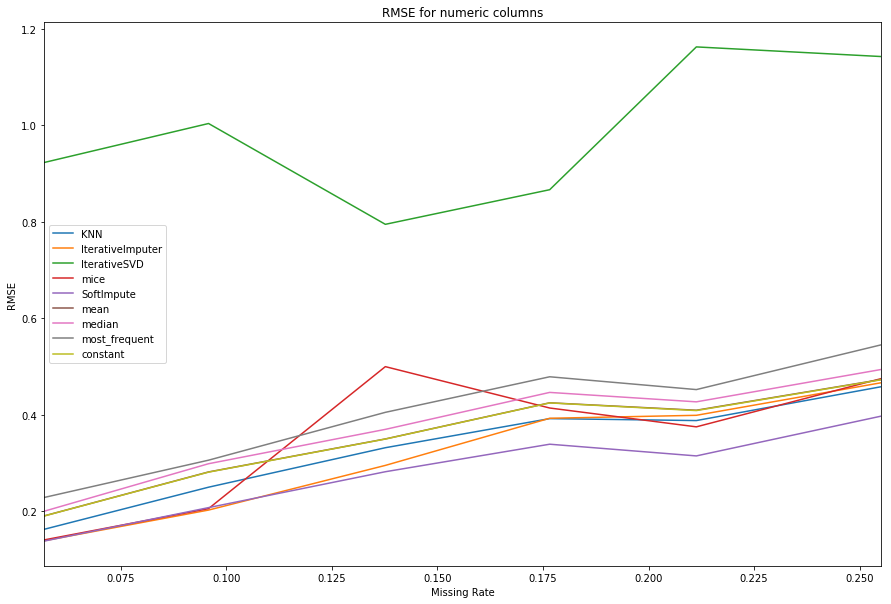

<Figure size 432x288 with 0 Axes>

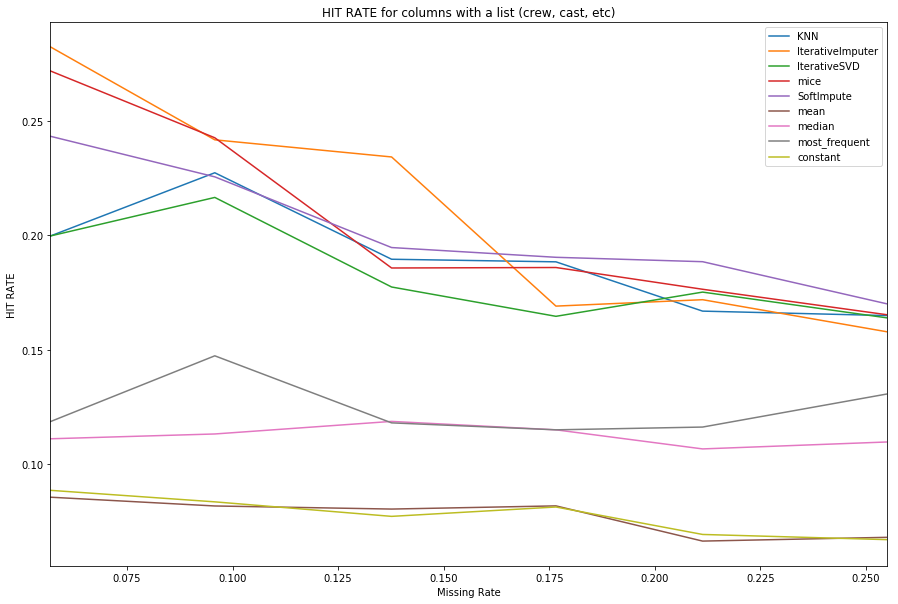

<Figure size 432x288 with 0 Axes>

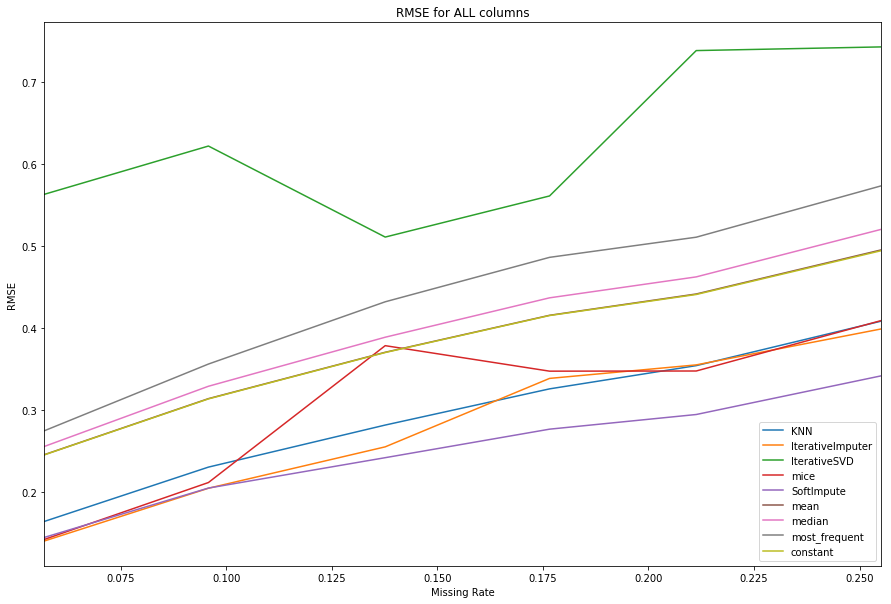

In [27]:
plt.figure()
rmsDict.plot(figsize=(15, 10))
plt.title("RMSE for numeric columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

plt.figure()
hitDict.plot(figsize=(15, 10))
plt.title("HIT RATE for columns with a list (crew, cast, etc)")
plt.ylabel('HIT RATE')
plt.xlabel('Missing Rate')

plt.figure()
rmsAllDict.plot(figsize=(15, 10))
plt.title("RMSE for ALL columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

In [28]:
missing_rate_list

[0.056887784583381486,
 0.09580492314804114,
 0.13766901652606034,
 0.17658615509071998,
 0.21131399514619206,
 0.255084941638738]

# Normalizing the data and seperating the train and test set

In [40]:
#from https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

from sklearn import preprocessing

# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(df)
x_train_norm = std_scale.transform(df)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=df.index, columns=df.columns) 
df.update(training_norm_col)

df.head()

id    budget  original_language  popularity  release_date   runtime  \
0 -1.731474 -0.419466          -0.317964   -0.155998      1.092601 -0.728309   
1 -1.730319  0.324279          -0.317964   -0.017714      0.141105  0.224458   
2 -1.729164 -0.725546          -0.317964    4.613849      1.059732 -0.156649   
3 -1.728009 -0.785618          -0.078653   -0.436981      0.826182  0.653203   
4 -1.726855  0.134302           0.160657   -0.604463      0.547406  0.462650   

    revenue  belongs_to_collection0_mean  belongs_to_collection0_var  \
0 -0.395691                          NaN                         NaN   
1  0.206703                          NaN                         NaN   
2 -0.390038                          NaN                         NaN   
3 -0.368890                          NaN                         NaN   
4 -0.456710                          NaN                         NaN   

   genres0_mean  ...  cast1_mean  cast1_var  cast2_mean  cast2_var  \
0      0.306436  ...   -0.511348  -0.341212   -0.829415  -0.404211   
1     -0.394347  ...    0.927130  -0.274889   -0.198387  -0.312239   
2     -0.394347  ...   -0.617116  -0.319736   -0.369954  -0.320440   
3     -0.394347  ...   -0.335723  -0.193556   -0.234615  -0.083375   
4      0.644419  ...   -0.007457   0.006379    0.136871   0.121315   

   crew0_mean  crew0_var  crew1_mean  crew1_var  crew2_mean  crew2_var  
0   -0.481197  -0.224155   -0.560333  -0.252516   -0.610065  -0.321882  
1   -0.218567  -0.113018   -0.169589  -0.175243    0.333991  -0.211823  
2   -0.570450  -0.221476   -0.345100  -0.231895   -0.458247  -0.305316  
3   -0.454312  -0.224959   -0.527626  -0.256871   -0.664177  -0.326068  
4    0.021429  -0.018311    0.030162  -0.036621    0.006465  -0.019621  

[5 rows x 51 columns]

In [30]:
# save to save.csv

df.to_csv('save_Cleaned_'+file_name+'.csv',index_label = False)
df = pd.read_csv('save_Cleaned_'+file_name+'.csv')

# Prediction with the chosen imputetion method

In [31]:
#creating df df_pred to do prediction for those with non-nan values > 2000
predicting_list = []
print("These are the columns that we are not doing prediction to fill the empty cell")
for col in df:
    
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col,df[col].count())
predicting_list.remove("revenue")


df_pred = pd.DataFrame()
df_pred = df[predicting_list].copy()

These are the columns that we are not doing prediction to fill the empty cell
belongs_to_collection0_mean 132
belongs_to_collection0_var 132
genres2_mean 1428
genres2_var 1428
production_companies1_mean 1185
production_companies1_var 1185
production_companies2_mean 557
production_companies2_var 557
production_countries1_mean 716
production_countries1_var 716
production_countries2_mean 186
production_countries2_var 186
spoken_languages1_mean 860
spoken_languages1_var 860
spoken_languages2_mean 317
spoken_languages2_var 317


In [32]:
#cause knn dosent accept a string heading, so changng the heading
df_pred.columns = range(df_pred.shape[1])
df_pred.head()

0         1         2         3         4         5         6   \
0 -1.731474 -0.419613 -0.317964 -0.155998  1.092601 -0.726722  0.305793   
1 -1.730319  0.226211 -0.317964 -0.017714  0.141105  0.223861 -0.394194   
2 -1.729164 -0.685394 -0.317964  4.613849  1.059732 -0.156372 -0.394194   
3 -1.728009 -0.737557 -0.078653 -0.436981  0.826182  0.651624 -0.394194   
4 -1.726855       NaN  0.160657 -0.604463  0.547406  0.461507  0.643392   

         7         8         9   ...        24        25        26        27  \
0  0.119747       NaN       NaN  ... -0.484960 -0.310352 -0.744661 -0.341772   
1 -0.234565 -0.667050 -0.565860  ...  0.846995 -0.248294 -0.176465 -0.258123   
2 -0.234565       NaN       NaN  ... -0.582895 -0.290257 -0.330949 -0.265582   
3 -0.234565 -0.212953 -0.399303  ...       NaN       NaN       NaN       NaN   
4  0.308108  1.027674  1.206886  ...       NaN       NaN       NaN       NaN   

         28        29        30        31        32        33  
0 -0.477656 -0.212346 -0.535937 -0.225419 -0.568454 -0.277494  
1 -0.228641 -0.107887 -0.177994 -0.154308  0.264279 -0.178211  
2 -0.562282 -0.209828 -0.338771 -0.206442 -0.434538 -0.262550  
3 -0.452164 -0.213101 -0.505975 -0.229426 -0.616184 -0.281270  
4       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 34 columns]

In [33]:
#checking if everything is in float for df
for x in df:
    for y in range(len(df)):
        if not (isinstance(df[x][y], float) or isinstance(df[x][y], int) or math.isnan(float(df[x][y]))):
            print(x,y,df[x][y],type(df[x][y]))

In [34]:
# finally doing the prediction lol ==" i want to cry
from fancyimpute import SoftImpute 

now = time.time()

df_pred = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_pred))

#adding back the columns for df_pred
df_pred.columns = predicting_list

print(time.time() - now)

#merging df with df_pred
for col in df_pred:
    df[col] = df_pred[col]
    
df.head()

0.3925135135650635


id    budget  original_language  popularity  release_date   runtime  \
0 -1.731474 -0.419613          -0.317964   -0.155998      1.092601 -0.726722   
1 -1.730319  0.226211          -0.317964   -0.017714      0.141105  0.223861   
2 -1.729164 -0.685394          -0.317964    4.613849      1.059732 -0.156372   
3 -1.728009 -0.737557          -0.078653   -0.436981      0.826182  0.651624   
4 -1.726855  0.061247           0.160657   -0.604463      0.547406  0.461507   

    revenue  belongs_to_collection0_mean  belongs_to_collection0_var  \
0 -0.395691                          NaN                         NaN   
1  0.206703                          NaN                         NaN   
2 -0.390038                          NaN                         NaN   
3 -0.368890                          NaN                         NaN   
4 -0.456710                          NaN                         NaN   

   genres0_mean  ...  cast1_mean  cast1_var  cast2_mean  cast2_var  \
0      0.305793  ...   -0.484960  -0.310352   -0.744661  -0.341772   
1     -0.394194  ...    0.846995  -0.248294   -0.176465  -0.258123   
2     -0.394194  ...   -0.582895  -0.290257   -0.330949  -0.265582   
3     -0.394194  ...   -0.322340  -0.172193   -0.209086  -0.049970   
4      0.643392  ...   -0.018383   0.014884    0.125411   0.136196   

   crew0_mean  crew0_var  crew1_mean  crew1_var  crew2_mean  crew2_var  
0   -0.477656  -0.212346   -0.535937  -0.225419   -0.568454  -0.277494  
1   -0.228641  -0.107887   -0.177994  -0.154308    0.264279  -0.178211  
2   -0.562282  -0.209828   -0.338771  -0.206442   -0.434538  -0.262550  
3   -0.452164  -0.213101   -0.505975  -0.229426   -0.616184  -0.281270  
4   -0.001086  -0.018871    0.004989  -0.026739   -0.024625  -0.004829  

[5 rows x 51 columns]

In [35]:
# save to save.csv
df.to_csv('save_Predicted_'+file_name+'.csv',index_label = False)
df0 = pd.read_csv('save_Cleaned_'+file_name+'.csv')
df1 = pd.read_csv('save_Predicted_'+file_name+'.csv')

In [36]:
df0.head()

id    budget  original_language  popularity  release_date   runtime  \
0 -1.731474 -0.419613          -0.317964   -0.155998      1.092601 -0.726722   
1 -1.730319  0.226211          -0.317964   -0.017714      0.141105  0.223861   
2 -1.729164 -0.685394          -0.317964    4.613849      1.059732 -0.156372   
3 -1.728009 -0.737557          -0.078653   -0.436981      0.826182  0.651624   
4 -1.726855       NaN           0.160657   -0.604463      0.547406  0.461507   

    revenue  belongs_to_collection0_mean  belongs_to_collection0_var  \
0 -0.395691                          NaN                         NaN   
1  0.206703                          NaN                         NaN   
2 -0.390038                          NaN                         NaN   
3 -0.368890                          NaN                         NaN   
4 -0.456710                          NaN                         NaN   

   genres0_mean  ...  cast1_mean  cast1_var  cast2_mean  cast2_var  \
0      0.305793  ...   -0.484960  -0.310352   -0.744661  -0.341772   
1     -0.394194  ...    0.846995  -0.248294   -0.176465  -0.258123   
2     -0.394194  ...   -0.582895  -0.290257   -0.330949  -0.265582   
3     -0.394194  ...         NaN        NaN         NaN        NaN   
4      0.643392  ...         NaN        NaN         NaN        NaN   

   crew0_mean  crew0_var  crew1_mean  crew1_var  crew2_mean  crew2_var  
0   -0.477656  -0.212346   -0.535937  -0.225419   -0.568454  -0.277494  
1   -0.228641  -0.107887   -0.177994  -0.154308    0.264279  -0.178211  
2   -0.562282  -0.209828   -0.338771  -0.206442   -0.434538  -0.262550  
3   -0.452164  -0.213101   -0.505975  -0.229426   -0.616184  -0.281270  
4         NaN        NaN         NaN        NaN         NaN        NaN  

[5 rows x 51 columns]

In [37]:
df.head()

id    budget  original_language  popularity  release_date   runtime  \
0 -1.731474 -0.419613          -0.317964   -0.155998      1.092601 -0.726722   
1 -1.730319  0.226211          -0.317964   -0.017714      0.141105  0.223861   
2 -1.729164 -0.685394          -0.317964    4.613849      1.059732 -0.156372   
3 -1.728009 -0.737557          -0.078653   -0.436981      0.826182  0.651624   
4 -1.726855  0.061247           0.160657   -0.604463      0.547406  0.461507   

    revenue  belongs_to_collection0_mean  belongs_to_collection0_var  \
0 -0.395691                          NaN                         NaN   
1  0.206703                          NaN                         NaN   
2 -0.390038                          NaN                         NaN   
3 -0.368890                          NaN                         NaN   
4 -0.456710                          NaN                         NaN   

   genres0_mean  ...  cast1_mean  cast1_var  cast2_mean  cast2_var  \
0      0.305793  ...   -0.484960  -0.310352   -0.744661  -0.341772   
1     -0.394194  ...    0.846995  -0.248294   -0.176465  -0.258123   
2     -0.394194  ...   -0.582895  -0.290257   -0.330949  -0.265582   
3     -0.394194  ...   -0.322340  -0.172193   -0.209086  -0.049970   
4      0.643392  ...   -0.018383   0.014884    0.125411   0.136196   

   crew0_mean  crew0_var  crew1_mean  crew1_var  crew2_mean  crew2_var  
0   -0.477656  -0.212346   -0.535937  -0.225419   -0.568454  -0.277494  
1   -0.228641  -0.107887   -0.177994  -0.154308    0.264279  -0.178211  
2   -0.562282  -0.209828   -0.338771  -0.206442   -0.434538  -0.262550  
3   -0.452164  -0.213101   -0.505975  -0.229426   -0.616184  -0.281270  
4   -0.001086  -0.018871    0.004989  -0.026739   -0.024625  -0.004829  

[5 rows x 51 columns]